## Importing dependencies

In [3]:
from fastai.vision.all import *
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from time import sleep
from PIL import Image

# Train

In [16]:
# defizione classe di insetti che il modello deve riconoscere
searches = 'lucila', 'mosca domestica', 'piofila'
path = Path('../type_insect')

# verifica integrità delle immagini, solo se possono essere aperte e non hanno altri problemi che invalidano
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)  # se non passa vengono rimosse
total_images = len(get_image_files(path))
valid_images = total_images - len(failed)
# numero di immagini non valide
print("fallite:", len(failed), "riuscite:", valid_images)

fallite: 0 riuscite: 1052


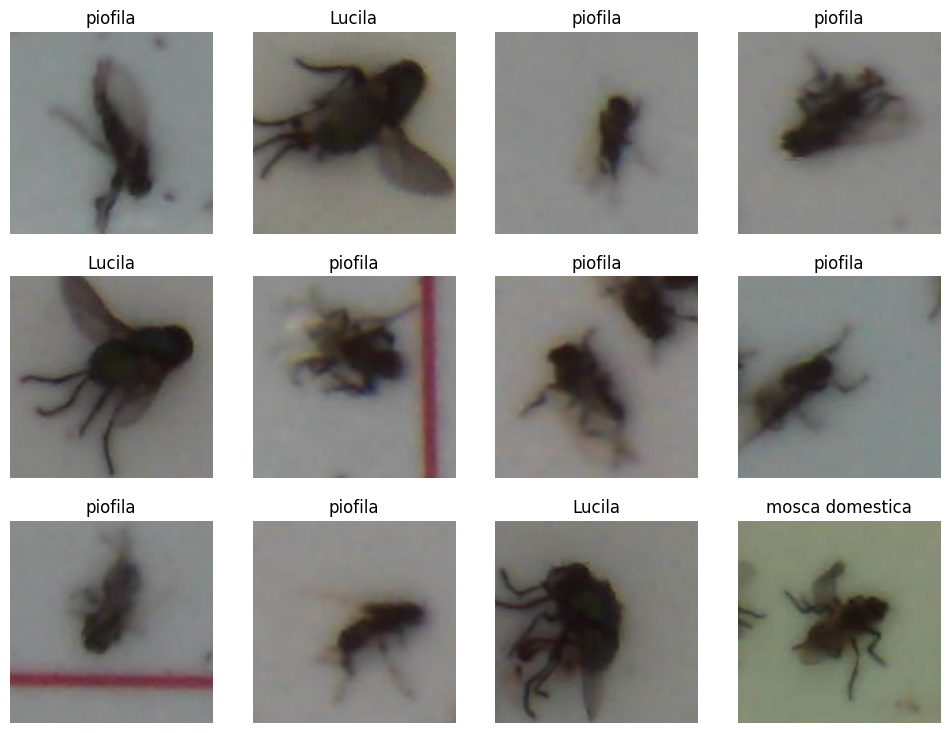

In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #specifica che stiamo lavorando in blocchi di immagini e categorie
    get_items=get_image_files, #indica come ottenere elengo immagini nella directory specificata
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #divide casualmente il dataset in set di addestramento e e di validazione (20%)
    get_y=parent_label, #determina come ottenere le etichette dai percorsi dei file 
    item_tfms=[Resize(192, method='squish')] #applica una trasformazione di ridimensionamento alle immagini 
).dataloaders(path, bs=32) #creazione degli oggetti dataloaders con il datablock precedente, bs dimensione del batch (paralellizzazione del batch su GPU)

dls.show_batch(max_n=12)

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\menga/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 12.5MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.007246,0.309117,0.114286,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.123115,0.014176,0.004762,00:44
1,0.060542,0.007531,0.000000,00:41
2,0.034351,0.002593,0.000000,00:39
3,0.026124,0.005501,0.004762,00:38
4,0.017123,0.007445,0.004762,00:39


In [21]:
learn.save('insectaCam_weights') #salva i pesi della rete allenata 
learn.export('insectaCamModel.pkl') #salva tutto il modello

# Test

In [55]:
from PIL import Image

# Definisci il percorso dell'immagine
image_path = 'test.png'  # Sostituisci con il percorso corretto dell'immagine

# Esegui la previsione
is_mosquito, _, probs = learn.predict(PILImage.create(image_path))

# Stampa le probabilità per ogni classe
print(f"Probability for Lucila: {probs[0]:.4f}")
print(f"Probability for Mosca Domestica: {probs[1]:.4f}")
print(f"Probability for Piofila: {probs[2]:.4f}")


Probability for Lucila: 0.0007
Probability for Mosca Domestica: 0.0005
Probability for Piofila: 0.9989
